### Using Machine Learning to Develop a Supernatural Martian Substance

A visionary Company X is on a mission to build a self-sustaining city on the red planet. As part of this mission, scientists at Company X are developing a supernatural substance that can withstand Mars’ extraterrestrial conditions. This substance will be the building block of this futuristic Martian city. Can Company X turn this idea into a reality? In this assignment, you will use machine learning to predict the quality of this substance based on historical data.

In [66]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics as stat
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [67]:
# Read CSV and print dataset shape
dataset = pd.read_csv('Data_Regression_Train.csv')
print('Data_Regression_Train.csv')
print(dataset.shape)
#dataset.head()

Data_Regression_Train.csv
(4000, 16)


We have 15 variables plus the outcome in this dataset. All data are numerical.<br>
Our goal is to predict a numeric value for our target variable.

In [68]:
# Refactoring not useful
# dataset.rename(index = str, columns = {'1':'cA','2':'cB','3':'cC','4':'cD','5':'cE','6':'cF','7':'cG','8':'RefractTest','9':'pA','10':'RadioactTest','11':'pB','12':'pC','13':'pD','14':'pE','15':'pF'}, inplace = True)
#print(list(dataset.columns.values))
dataset.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Target
0,0.392523,1.529391,-1.190833,-0.263736,1.034926,1.450200,0.483843,0,-1.606245,1,-0.904203,0.944466,-2.066797,-1.137719,-0.801989,-13.390258
1,-0.070729,-0.543017,0.367843,-1.098385,1.386151,1.367771,0.532697,0,0.225341,1,1.532991,-0.755426,-1.824408,-0.015377,-0.275990,-27.170405
2,0.791887,-0.687884,-0.284550,-1.183196,0.153298,2.464571,-1.443464,0,-1.319039,1,-0.548015,-1.118633,0.268017,-0.491163,0.564172,-187.261504
3,-1.841402,0.564376,-0.545430,-1.121581,0.958518,-0.440323,0.565404,0,0.777585,0,1.264068,0.148411,2.719895,-0.521703,-0.350202,-265.108404
4,1.056602,-0.397247,0.638533,-0.180659,-0.443545,0.442201,-0.106325,0,-0.308637,1,-0.854053,0.221956,-1.009645,-0.044942,-1.190933,153.061161


Let's create a list for the indipendent variables, which we will use later.

In [72]:
# Features list
features = (list(dataset.columns.values))[0:15]

#### Data Exploration

Using Pandas .describe() funcion we can have the dataset summary at a glance :<br>
  - There are __no missing data__ in this 4000 rows dataset.<br>
  - __No zero-variance variables__. Which means potentially, they all carry some information.
  - By looking at 1st and 3rd quartile of the distribution, we can suppose that all the variables have a symmetric, gaussian, distribution. The only exceptions are dummies variable "8" and variable '10'.
  - Almost all the data are 0-centered (mean) and with standard error close to 1. Thus they are in scale.

In [73]:
# Dataset description
dataset.describe()
# no missing values, no zero variance features

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Target
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.000261,0.017734,-0.007795,0.012498,-0.010918,-0.016477,0.010572,0.518000,-0.007874,0.58025,0.015386,-0.007220,-0.014859,-0.014764,0.032098,1.907709
std,1.017056,0.980291,1.011659,0.976791,0.995160,0.978880,1.007879,0.499738,1.001198,0.49358,0.990545,1.006025,0.989528,1.009530,1.002193,186.370519
min,-3.569790,-3.054249,-3.440784,-3.448280,-3.747447,-3.581474,-3.243878,0.000000,-3.458497,0.00000,-3.726142,-3.642847,-3.607505,-3.774073,-3.372992,-643.709535
25%,-0.665659,-0.625217,-0.699968,-0.650466,-0.666369,-0.664545,-0.674427,0.000000,-0.685799,0.00000,-0.651948,-0.676581,-0.687014,-0.685063,-0.636013,-121.588762
50%,-0.009536,0.016039,-0.014302,0.015137,0.001239,-0.020759,0.001848,1.000000,-0.023406,1.00000,0.025120,0.006137,-0.015838,-0.014835,0.023278,4.538753
75%,0.672891,0.660136,0.698973,0.666435,0.666005,0.642303,0.696575,1.000000,0.679844,1.00000,0.691286,0.659458,0.659312,0.638562,0.704692,131.801003
max,3.734620,3.547635,3.676205,3.542074,3.741580,3.958712,3.643804,1.000000,3.800605,1.00000,3.459111,3.569280,3.387601,4.299323,3.684574,638.247544


The distribution plot of the variables confirm that __they all have a Gaussian Distribution__.

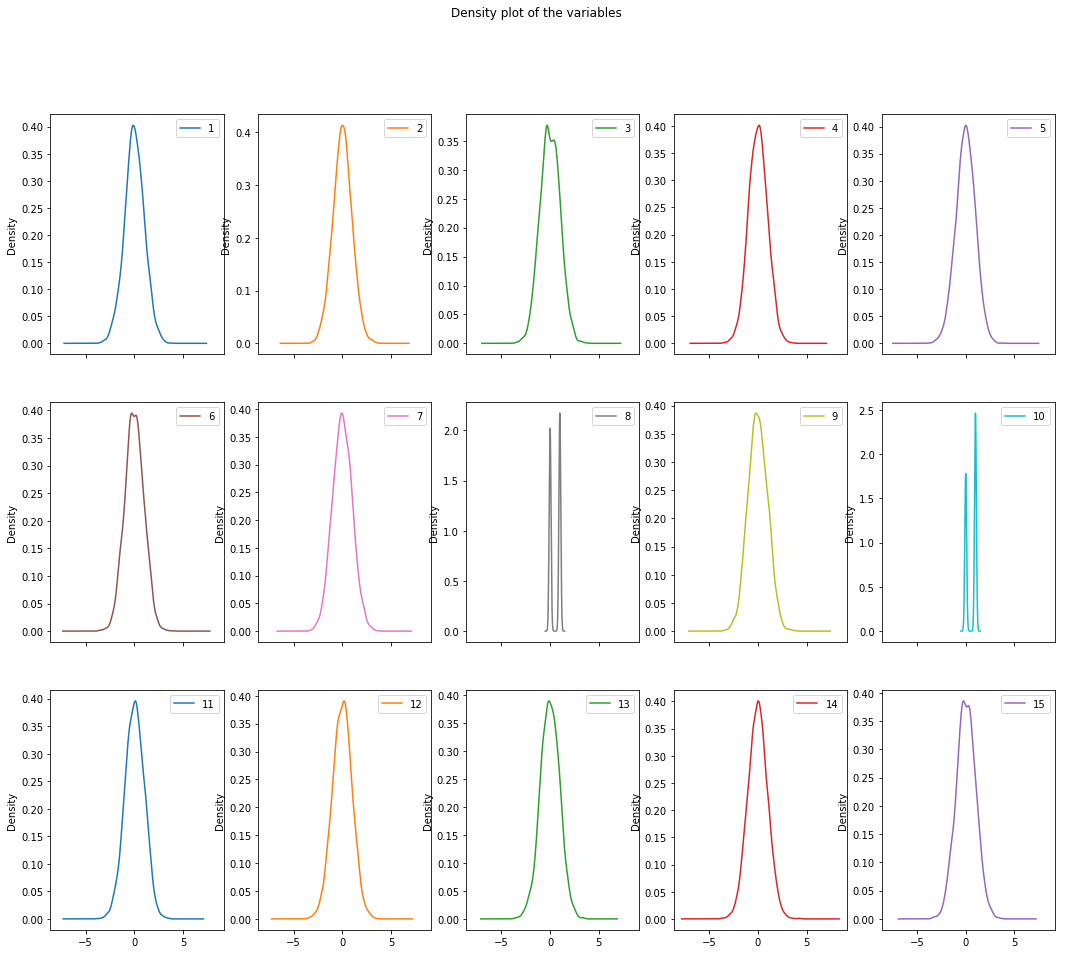

In [74]:
# Kernel density esimation
dataset.drop('Target', axis=1).plot.kde(figsize=(18,15), layout=(3,5),subplots = True,title = "Density plot of the variables")
plt.show()

By looking at the correlation heatmap, we can see that some variables are more correlated to the target, while some are not correlated. This is confirmed by the univariate scatter plot right after.
<br>The important information from this heatmap is that variables are indipendent, thus there is __absence of multicollinearity__.

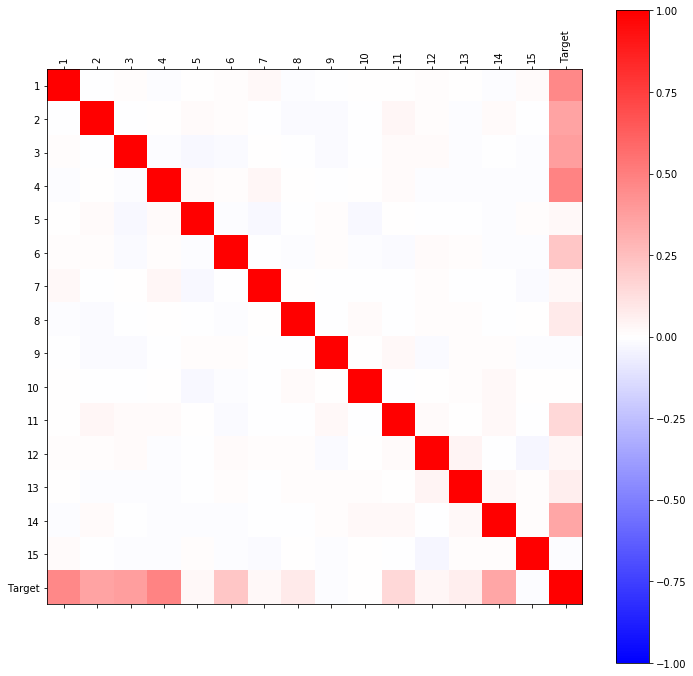

In [75]:
# Plot correlation heatmap
correlations = dataset.corr()

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap = 'bwr')
fig.colorbar(cax)
ticks = np.arange(0,16,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(dataset.columns.values),rotation='vertical')
ax.set_yticklabels(list(dataset.columns.values) )

plt.show()

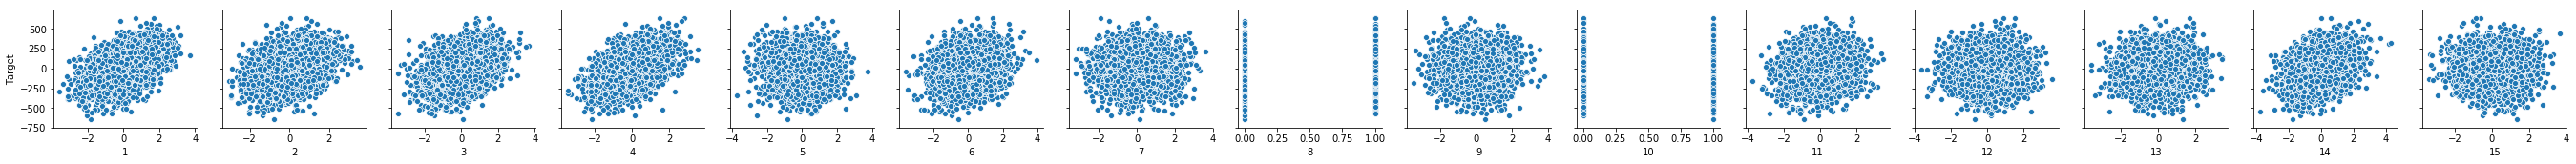

In [76]:
sns.pairplot(dataset, x_vars= features , y_vars='Target')

plt.show()

In [77]:
# Correlation univariate
(dataset[features].apply(lambda x: x.corr(dataset.Target)))

1     0.464066
2     0.353172
3     0.376131
4     0.478007
5     0.026212
6     0.221729
7     0.026950
8     0.085570
9    -0.009050
10    0.005515
11    0.150283
12    0.031317
13    0.066465
14    0.347769
15   -0.011512
dtype: float64

That said, features data seems to match with the hypotesis standing at the base of a regression model. Moreover scaling is not necessary since the variables are already experssed in the same scale and distribute symmetrically.
<br>We coud approach to this problem by training 3 models:
    - An Ordinary Least Squares model (classic linear regression).
    - A Random Forest Regression.
    - A Support Vector Machines regression.

First, let's use our list of features to create the X matrix and the y vector:

In [78]:
# Divide the X matrix and target vector
X = dataset[features]
y = dataset['Target']

Since we have 4000 units, we can split the data set with a 3/4 ratio for training set and 1/3 for the leave-one-out testing set.
<br>Then, training set will be cross validated in 3 fold of 1000 units each.

In [79]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [80]:
np.shape(X_test)

(1000, 15)

#### Linear Regression Model

In [81]:
# LINEAR REGRESSION MODEL "lr"

regressor = LinearRegression() 
parameters = {'fit_intercept':[True,False], 
              'copy_X':[True, False]}

# Optimization & Cross Validation
gs_lr = GridSearchCV(regressor, parameters, cv=3) 
gs_lr = gs_lr.fit(X_train,y_train)


print('***RESULTS***')
print("Best score: %f using %s" % (gs_lr.best_score_, gs_lr.best_params_))
means = gs_lr.cv_results_['mean_test_score']
stds = gs_lr.cv_results_['std_test_score']
params = gs_lr.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Test
gs_lr.score(X_test, y_test)

***RESULTS***
Best score: 0.917599 using {'copy_X': True, 'fit_intercept': True}
0.917599 (0.005350) with: {'copy_X': True, 'fit_intercept': True}
0.914786 (0.005932) with: {'copy_X': True, 'fit_intercept': False}
0.917599 (0.005350) with: {'copy_X': False, 'fit_intercept': True}
0.914786 (0.005932) with: {'copy_X': False, 'fit_intercept': False}


0.9232067792010106

Gridsearch Crossvalidation results tells us that this is the best setting for our regression model. <br>
At this point we need to __train the optimal model on all the training data.__<br>

In [82]:
# Optimal Linear Regression
regressor_opt = LinearRegression(copy_X = True, fit_intercept = True) 
lr = regressor_opt.fit(X_train,y_train)
# Evaluation on Test Set via Mean Absolute Error
print("MAE train: ", mean_absolute_error(y_train, lr.predict(X_train)))
print("MAE test: ", mean_absolute_error(y_test, lr.predict(X_test)))

MAE train:  42.711722619276756
MAE test:  41.35863213431605


Since there is a good balance between train and test MAE, we could __rely on this model as it doesn't overfit.__

#### Random Forest Regression

The hyperparameters tuning for Random Forest can be computatioally expensive when using GridSearchCV, since all the different combinations of parameters are selected.<br>
We want to use __RandomizedSearchCV__ which select only a random of different combinations. This number is controlled by the "n_iter" parameter (we use 100 iters and 3 fold cross validations).

In [14]:
# RANDOM FOREST 'rf'

regressor = RandomForestRegressor(random_state = 42)

parameters = {# resampling with or withut repcement
              'bootstrap': [True, False],
              # Maximum number of levels in tree
              'max_depth': [5, 10, 50, 100, None],
              # Number of features to consider at every split
              'max_features': ['auto', 'sqrt'],
              # Minimum number of samples required at each leaf node
              'min_samples_leaf': [1, 2, 4],
              # Minimum number of samples required to split a node
              'min_samples_split': [2, 5, 10],
              # Number of trees in random forest
              'n_estimators': [10, 50, 100, 500, 1000]}
 
gs_rf = RandomizedSearchCV(regressor, parameters, cv=3, n_iter = 100, verbose = 2) 

gs_rf = gs_rf.fit(X_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.0s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.0s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=10, min_samples_spli

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.6s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   0.3s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   0.3s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_s

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=10, mi

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.6s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.6s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=500, min_sa

[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=100, min_samples_

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, bootstrap=False, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=True, total=   0.0s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_sa

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   2.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   2.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   2.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False, total=  13.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_e

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   3.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   3.7s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=10, min_s

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, total=   0.3s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=   3.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=   3.8s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=   3.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estima

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 10.5min finished


***RESULTS***
Best score: 0.794051 using {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
0.717360 (0.005330) with: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
0.695613 (0.020369) with: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
0.562817 (0.004159) with: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
0.768397 (0.007626) with: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
0.785475 (0.013409) with: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}
0.515635 (0.021378) with: {'n_estimators': 100, 'min

0.8097357373823227

In [17]:
print('***RESULTS***')
print("Best score: %f using %s" % (gs_rf.best_score_, gs_rf.best_params_))
means = gs_rf.cv_results_['mean_test_score']
stds = gs_rf.cv_results_['std_test_score']
params = gs_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***RESULTS***
Best score: 0.794051 using {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
0.717360 (0.005330) with: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
0.695613 (0.020369) with: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
0.562817 (0.004159) with: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
0.768397 (0.007626) with: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
0.785475 (0.013409) with: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}
0.515635 (0.021378) with: {'n_estimators': 100, 'min

In [83]:
# Optimal Random Forest
random_opt = RandomForestRegressor(n_estimators=1000, 
                                   min_samples_split=2, 
                                   min_samples_leaf=2, 
                                   max_features='auto',
                                   max_depth=50,
                                   bootstrap=True) 
rf = random_opt.fit(X_train,y_train)
# Evaluation on Test Set via Mean Absolute Error
print("MAE train: ", mean_absolute_error(y_train, rf.predict(X_train)))
print("MAE test: ", mean_absolute_error(y_test, rf.predict(X_test)))

MAE train:  26.40923572374659
MAE test:  62.456777222652676


However, The Random Forest is overfitting the data, as there is too much differenct between Training set MAE and Testing set MAE.

#### Support Vector Machines Regression

In this case we will try to find the optimal value of "C". 
A smaller value of __C increases the margin of the hyperplane__ while larger values reduce it.<br>
Instead the value of __"epsilon" defines a margin of tolerance for the errors__: the larger "epsilon" is, the larger errors you admit in your solution.

In [84]:
# SVR  'sv'

regressor = SVR()
parameters = {'kernel': ('linear', 'rbf','poly'), 
              'C':[1.5, 10],
              'gamma': [1e-7, 1e-4],
              'epsilon':[0.1,0.2,0.5,0.3]}

#DEFINE YOUR GRIDSEARCH 
gs_sv = GridSearchCV(regressor, parameters, cv=3, verbose = 2) #with no params it reduces to a CV

gs_sv = gs_sv.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................
[CV] ... C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ... C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................
[CV] ... C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV] ...... C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV] ...... C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV] ...... C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV] ..... C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV] ..... C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV] .

[CV] ...... C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf, total=   0.1s
[CV] C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly ....................
[CV] ..... C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly ....................
[CV] ..... C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly ....................
[CV] ..... C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV] .. C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV] .. C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV] .. C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf ....................
[CV] .

[CV] ... C=10, epsilon=0.5, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=linear ..................
[CV] ... C=10, epsilon=0.5, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=linear ..................
[CV] ... C=10, epsilon=0.5, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV] ...... C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV] ...... C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV] ...... C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=poly ....................
[CV] ..... C=10, epsilon=0.5, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=poly ....................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   30.7s finished


In [85]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs_sv.best_score_, gs_sv.best_params_))
means = gs_sv.cv_results_['mean_test_score']
stds = gs_sv.cv_results_['std_test_score']
params = gs_sv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs_sv.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.917261 using {'C': 10, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}
0.916722 (0.004479) with: {'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}
-0.001716 (0.002219) with: {'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'rbf'}
-0.001720 (0.002219) with: {'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'poly'}
0.916722 (0.004479) with: {'C': 1.5, 'epsilon': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
0.002861 (0.002272) with: {'C': 1.5, 'epsilon': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.001720 (0.002219) with: {'C': 1.5, 'epsilon': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}
0.916705 (0.004471) with: {'C': 1.5, 'epsilon': 0.2, 'gamma': 1e-07, 'kernel': 'linear'}
-0.001698 (0.002198) with: {'C': 1.5, 'epsilon': 0.2, 'gamma': 1e-07, 'kernel': 'rbf'}
-0.001703 (0.002198) with: {'C': 1.5, 'epsilon': 0.2, 'gamma': 1e-07, 'kernel': 'poly'}
0.916705 (0.004471) with: {'C': 1.5, 'epsilon': 0.2, 'gamma': 0.0001, 'kernel': 'linear'}
0.

0.9227266795554477

In [86]:
# Fitting the optimanl SVR
svm_opt = SVR(C= 10,
             epsilon = 0.1,
             gamma = 1e-07,
             kernel = 'linear')

svm_mod = svm_opt.fit(X_train, y_train)
# THIS ASSIGNMENT IS EVALUAED ON MAE
print("MAE train: ", mean_absolute_error(y_train, svm_mod.predict(X_train)))
print("MAE test: ", mean_absolute_error(y_test, svm_mod.predict(X_test)))

MAE train:  42.635314644122765
MAE test:  41.44187874340376


The results of the 3 models suggests that:
    - Linear Regression and SVR have similar Mean Absolute Errors. 
    - Both Linear Regression and SVR don't overfit the data, as the difference between training and testing MAE is small.
    - Random Forest performs better on training set, but is less generalizable on testing data.

#### Unlabeled Data Prediction

Since Linear Regressiona and SVR have similar performance, I will prefer to use Linear Regression for this task as it's less complex and more generalizable one.
Let's import the unlabeled dataset:

In [132]:
# Read CSV and print testset shape
validation = pd.read_csv('Data_Regression_Test_Unlabeled.csv')
print('Data_Regression_Test_Unlabeled.csv')
print(validation.shape)
#dataset.head()

Data_Regression_Test_Unlabeled.csv
(8000, 15)


In [133]:
validation.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.068260,-1.109403,-0.210382,0.175201,0.267580,-0.395031,0.256556,1,1.964220,1,-1.439576,0.272552,0.203683,0.390998,-0.509824
1,-0.261958,-1.577900,0.501939,-1.761268,-0.402250,-1.230560,-0.043696,1,-0.424752,1,0.251492,-0.913980,1.319460,-0.157462,0.417784
2,-0.959060,0.198293,-0.561824,-2.287285,-1.293155,-1.161634,0.442543,0,0.583780,1,-2.186017,-1.329723,2.045052,-0.677397,0.095350
3,-0.577453,0.868575,0.240723,1.352240,-0.348857,0.237448,-0.551082,1,0.601101,1,-0.077819,0.833521,-0.049008,0.132320,1.491214
4,-0.759606,-1.373947,-1.202349,-1.031986,1.909736,0.149477,0.680694,1,2.005299,0,1.313171,0.491434,0.316489,-0.806792,-0.917610


In [134]:
# Prediction
prediction = lr.predict(validation)
prediction
validation['Prediction'] = prediction
validation.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Prediction
0,0.068260,-1.109403,-0.210382,0.175201,0.267580,-0.395031,0.256556,1,1.964220,1,-1.439576,0.272552,0.203683,0.390998,-0.509824,-62.659932
1,-0.261958,-1.577900,0.501939,-1.761268,-0.402250,-1.230560,-0.043696,1,-0.424752,1,0.251492,-0.913980,1.319460,-0.157462,0.417784,-276.595961
2,-0.959060,0.198293,-0.561824,-2.287285,-1.293155,-1.161634,0.442543,0,0.583780,1,-2.186017,-1.329723,2.045052,-0.677397,0.095350,-462.986722
3,-0.577453,0.868575,0.240723,1.352240,-0.348857,0.237448,-0.551082,1,0.601101,1,-0.077819,0.833521,-0.049008,0.132320,1.491214,184.325610
4,-0.759606,-1.373947,-1.202349,-1.031986,1.909736,0.149477,0.680694,1,2.005299,0,1.313171,0.491434,0.316489,-0.806792,-0.917610,-320.046980


In [135]:
print(validation.shape)

(8000, 16)


In [138]:
col_to_save = validation['Prediction']
col_to_save.shape

(8000,)

In [139]:
col_to_save.to_csv('892277.csv',sep=',')